In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
    
data = pd.read_csv('oceny_studentow.csv')
print(data)

     Unnamed: 0  indeks_studenta  ocena_lab  ocena_wyk
0             0           962560        5.0        3.0
1             1           905220        2.0        4.5
2             2           882698        2.0        3.5
3             3           856084        3.5        2.5
4             4           909337        4.0        5.0
..          ...              ...        ...        ...
493         493           909272        5.0        3.5
494         494           860148        4.0        2.0
495         495           919541        2.0        4.0
496         496           915447        4.5        4.0
497         497           905212        4.0        5.0

[498 rows x 4 columns]


In [4]:
data['ocena_kon'] = (data.ocena_lab*0.4)+(data.ocena_wyk*0.6)

roznica = (data['ocena_kon'] - data['ocena_kon'].apply(np.floor))
data.loc[data[ 'ocena_lab'] == 2.0, 'ocena_kon'] = 2.0
data.loc[data[ 'ocena_wyk'] == 2.0, 'ocena_kon'] = 2.0
data.loc[roznica > 0.5, 'ocena_kon'] = data['ocena_kon'].apply(np.ceil)
data.loc[roznica < 0.5, 'ocena_kon'] = data['ocena_kon'].apply(np.floor)
print(data)

     Unnamed: 0  indeks_studenta  ocena_lab  ocena_wyk  ocena_kon
0             0           962560        5.0        3.0        4.0
1             1           905220        2.0        4.5        2.0
2             2           882698        2.0        3.5        2.0
3             3           856084        3.5        2.5        3.0
4             4           909337        4.0        5.0        5.0
..          ...              ...        ...        ...        ...
493         493           909272        5.0        3.5        4.0
494         494           860148        4.0        2.0        2.0
495         495           919541        2.0        4.0        2.0
496         496           915447        4.5        4.0        4.0
497         497           905212        4.0        5.0        5.0

[498 rows x 5 columns]


In [9]:
idx = ['2.0', '3.0', '3.5', '4.0', '4.5', '5.0', 'średnia ocen', 'średnia końcowa', 'zaliczenie uzyskało', 'zaliczenia nie uzyskało']
    
nie_zaliczone = data[data['ocena_kon'] == 2.0]['ocena_kon'].count()
zaliczone = data[data['ocena_kon'] >= 3.0]['ocena_kon'].count()
    
count_lab_2_0 = data[ data['ocena_lab'] == 2.0]['ocena_lab'].count()
count_lab_3_0 = data[ data['ocena_lab'] == 3.0]['ocena_lab'].count()
count_lab_3_5 = data[ data['ocena_lab'] == 3.5]['ocena_lab'].count()
count_lab_4_0 = data[ data['ocena_lab'] == 4.0]['ocena_lab'].count()
count_lab_4_5 = data[ data['ocena_lab'] == 4.5]['ocena_lab'].count()
count_lab_5_0 = data[ data['ocena_lab'] == 5.0]['ocena_lab'].count()
   
count_wyk_2_0 = data[ data['ocena_wyk'] == 2.0]['ocena_wyk'].count()
count_wyk_3_0 = data[ data['ocena_wyk'] == 3.0]['ocena_wyk'].count()
count_wyk_3_5 = data[ data['ocena_wyk'] == 3.5]['ocena_wyk'].count()
count_wyk_4_0 = data[ data['ocena_wyk'] == 4.0]['ocena_wyk'].count()
count_wyk_4_5 = data[ data['ocena_wyk'] == 4.5]['ocena_wyk'].count()
count_wyk_5_0 = data[ data['ocena_wyk'] == 5.0]['ocena_wyk'].count()
    
wyk = pd.Series([count_wyk_2_0, count_wyk_3_0, count_wyk_3_5, count_wyk_4_0, count_wyk_4_5, count_wyk_5_0, data['ocena_wyk'].mean(), data['ocena_kon'].mean(), zaliczone, nie_zaliczone], index=idx)
    
lab = pd.Series([count_lab_2_0, count_lab_3_0, count_lab_3_5, count_lab_4_0, count_lab_4_5, count_lab_5_0, data['ocena_lab'].mean(), '', '', ''], index = idx)
    
finalData = pd.DataFrame([wyk, lab],index=['wykłady','laboratoria'])
    
print(finalData)
    
finalData.to_csv('Podsumowanie.csv')

               2.0   3.0   3.5   4.0   4.5   5.0  średnia ocen  \
wykłady       78.0  65.0  69.0  78.0  63.0  69.0      3.459839   
laboratoria  129.0  75.0  87.0  72.0  68.0  67.0      3.446787   

            średnia końcowa zaliczenie uzyskało zaliczenia nie uzyskało  
wykłady             3.13755               311.0                   187.0  
laboratoria                                                              


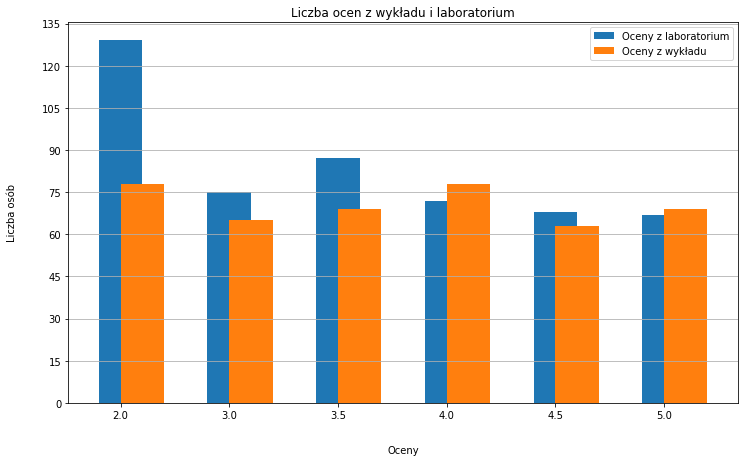

In [26]:
y_lab = np.array([count_lab_2_0, count_lab_3_0, count_lab_3_5, count_lab_4_0, count_lab_4_5, count_lab_5_0])
x_lab = np.arange(len(y_lab))

y_wyk = [count_wyk_2_0, count_wyk_3_0, count_wyk_3_5, count_wyk_4_0, count_wyk_4_5, count_wyk_5_0]
x_wyk = np.arange(len(y_lab))

plt.figure(figsize = (12, 7))

plt.title('Liczba ocen z wykładu i laboratorium')

plt.bar(x_lab, y_lab, label = 'Oceny z laboratorium', width = 0.4)
plt.bar(x_wyk, y_wyk, label = 'Oceny z wykładu', width = 0.4, align = 'edge')

plt.xticks(x_lab, [ 2.0, 3.0, 3.5, 4.0, 4.5, 5.0 ])
plt.yticks(np.arange(0, 150, 15))

plt.xlabel('Oceny', labelpad = 25)
plt.ylabel('Liczba osób', labelpad = 25)

plt.legend()

plt.grid(axis = 'y')

plt.show()